## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

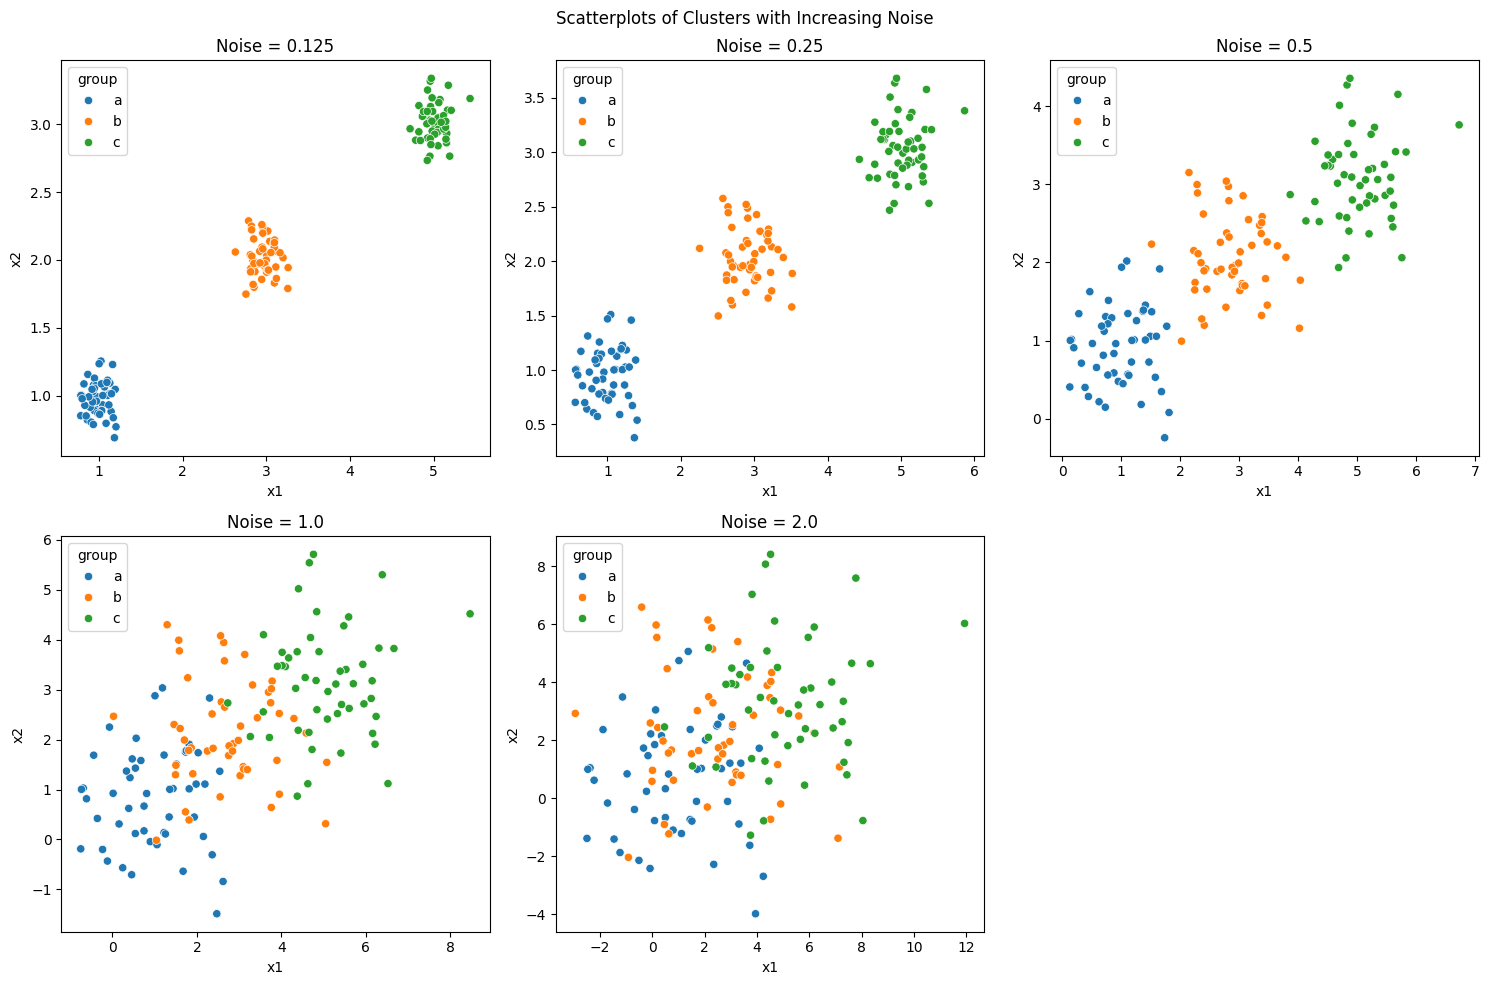

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots for each dataset
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatterplots of Clusters with Increasing Noise')

# Plot for noise = 0.125
sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group', ax=axes[0,0])
axes[0,0].set_title('Noise = 0.125')

# Plot for noise = 0.25
sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group', ax=axes[0,1])
axes[0,1].set_title('Noise = 0.25')

# Plot for noise = 0.5
sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group', ax=axes[0,2])
axes[0,2].set_title('Noise = 0.5')

# Plot for noise = 1.0
sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group', ax=axes[1,0])
axes[1,0].set_title('Noise = 1.0')

# Plot for noise = 2.0
sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group', ax=axes[1,1])
axes[1,1].set_title('Noise = 2.0')

# Remove the empty subplot
axes[1,2].remove()

plt.tight_layout()
plt.show()

In [ ]:
# As the noise increases, the clusters become more and more spread out. For example, the clusters are more spread out when noise is 2.0 than when it is 0.125, which are very tightly packed.

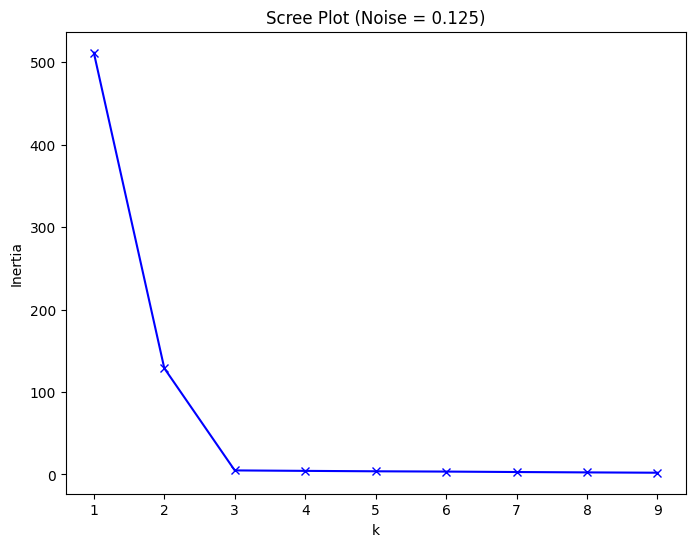

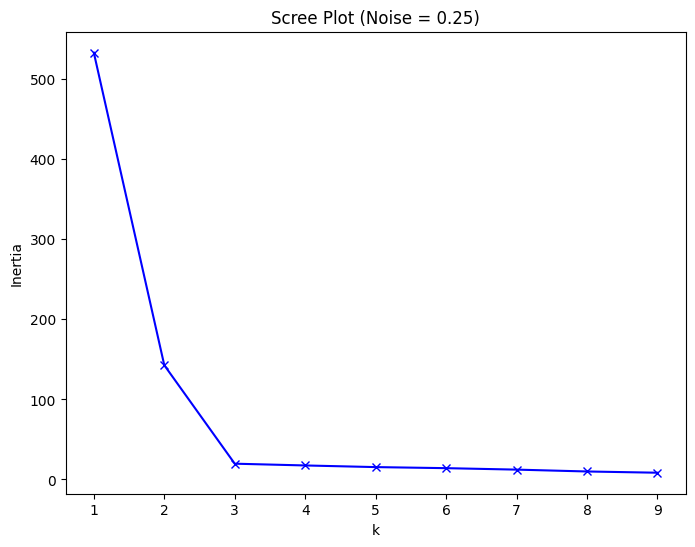

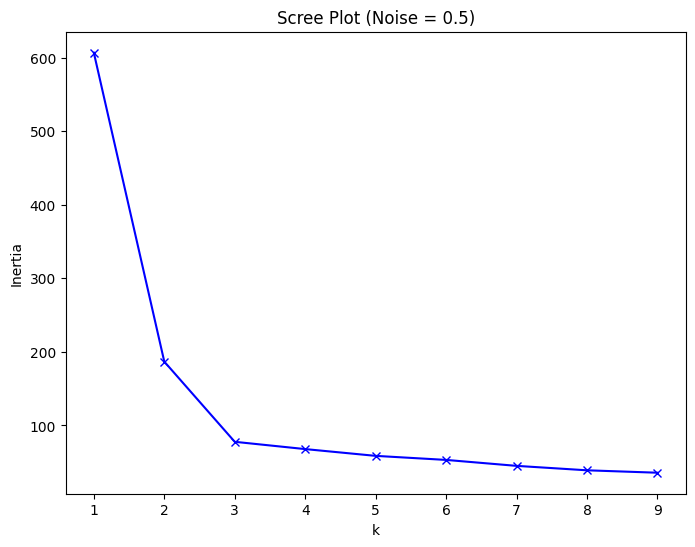

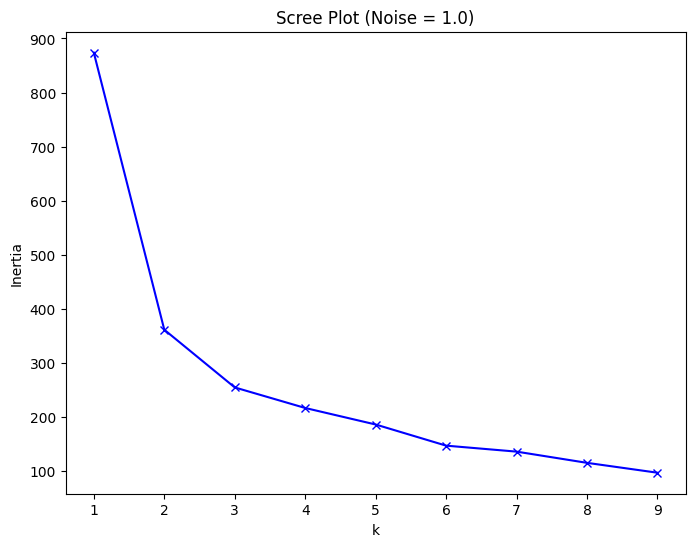

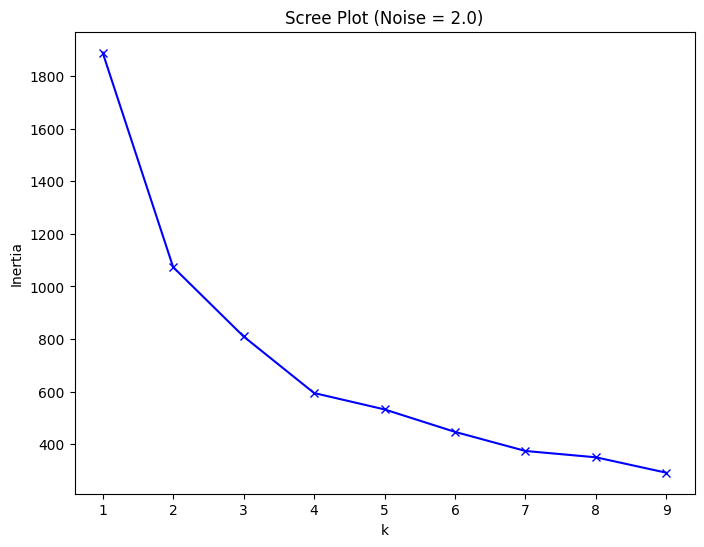

In [4]:
from sklearn.cluster import KMeans
import numpy as np

def create_scree_plot(df, noise_level):
    # Prepare data
    X = df[['x1', 'x2']].values
    
    # Calculate inertia for different k values
    inertias = []
    K = range(1, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title(f'Scree Plot (Noise = {noise_level})')
    plt.show()

# Create scree plots for each dataset
create_scree_plot(df0_125, 0.125)
create_scree_plot(df0_25, 0.25)
create_scree_plot(df0_5, 0.5)
create_scree_plot(df1_0, 1.0)
create_scree_plot(df2_0, 2.0)

In [5]:
# The scree plots show how the level of noise affects the ability to choose k. At noise = 0.125, the scree plot is very clear and shows a clear elbow at k = 3. At noise = 0.25, the scree plot is less clear, but there is still a clear elbow at k = 3. At noise = 0.5, the elbow becomes less clear, though k=3 can still be reasonably chosen. At noise = 1.0, the elbow is no longer clear, and k=3 is no longer a good choice. At noise = 2.0, the scree plot is very flat, and k=3 is no longer a good choice.

In [ ]:
#  The scree plots show that as noise increases from 0.125 to 2.0, the elbow at k=3 becomes progressively less distinct, eventually becoming nearly linear at the highest noise level, making it increasingly difficult to definitively select the optimal number of clusters.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the data
df = pd.read_csv('data/SIPRI Military Expenditure Database.csv')
df_2020 = df[df['Year'] == 2020].dropna()

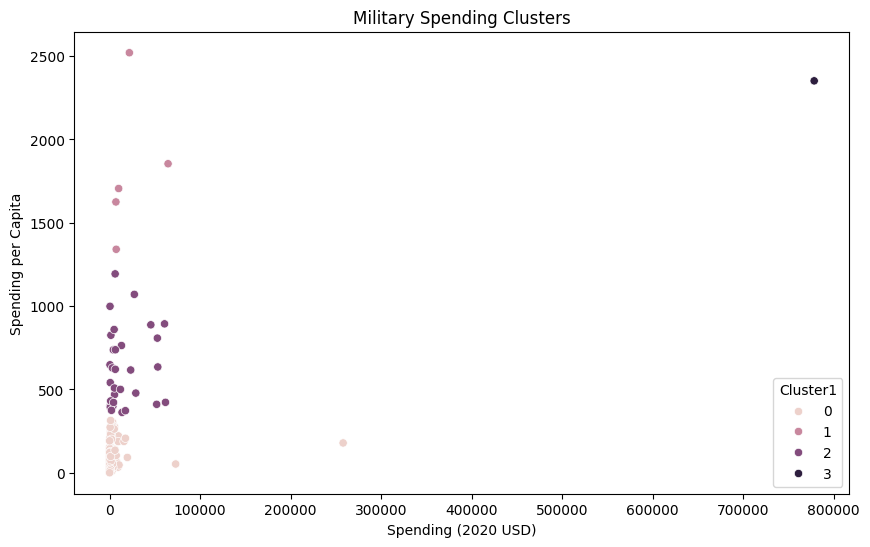

In [7]:
# Prepare data
X1 = df_2020[['Spending (2020 USD)', 'Spending per Capita']].values
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_2020['Cluster1'] = kmeans.fit_predict(X1_scaled)

# Create visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2020, x='Spending (2020 USD)', y='Spending per Capita', hue='Cluster1')
plt.title('Military Spending Clusters')
plt.show()

In [ ]:
# The United States appears in its own cluster due to its exceptionally high military spending. The clusters roughly correspond to major military powers, medium-sized military powers, and smaller military powers.

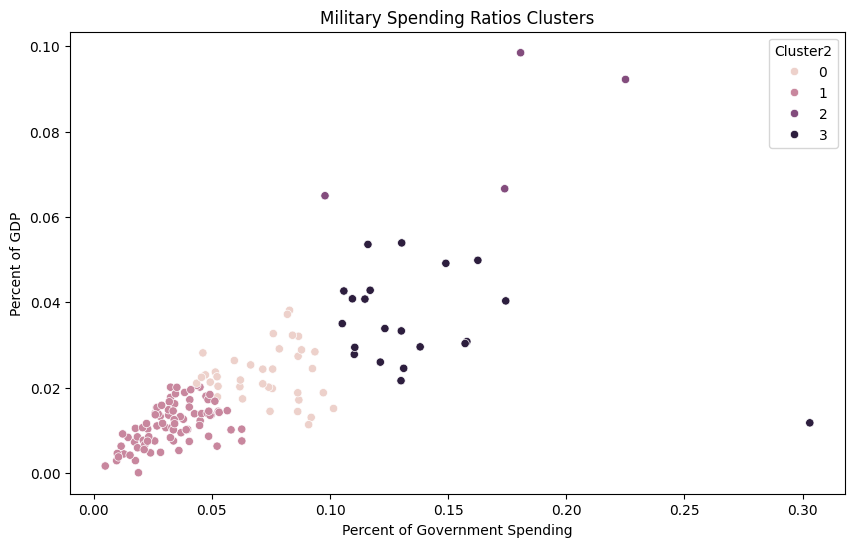

In [8]:
# Prepare data
X2 = df_2020[['Percent of Government Spending', 'Percent of GDP']].values
X2_scaled = scaler.fit_transform(X2)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_2020['Cluster2'] = kmeans.fit_predict(X2_scaled)

# Create visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2020, x='Percent of Government Spending', y='Percent of GDP', hue='Cluster2')
plt.title('Military Spending Ratios Clusters')
plt.show()

In [ ]:
# The patterns are different from the absolute spending clusters. Some countries with lower absolute spending have higher spending ratios. The United States is grouped with other countries that have moderate spending ratios.

In [9]:
# Prepare data
X3 = df_2020[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']].values
X3_scaled = scaler.fit_transform(X3)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_2020['Cluster3'] = kmeans.fit_predict(X3_scaled)

<Figure size 1200x1200 with 0 Axes>

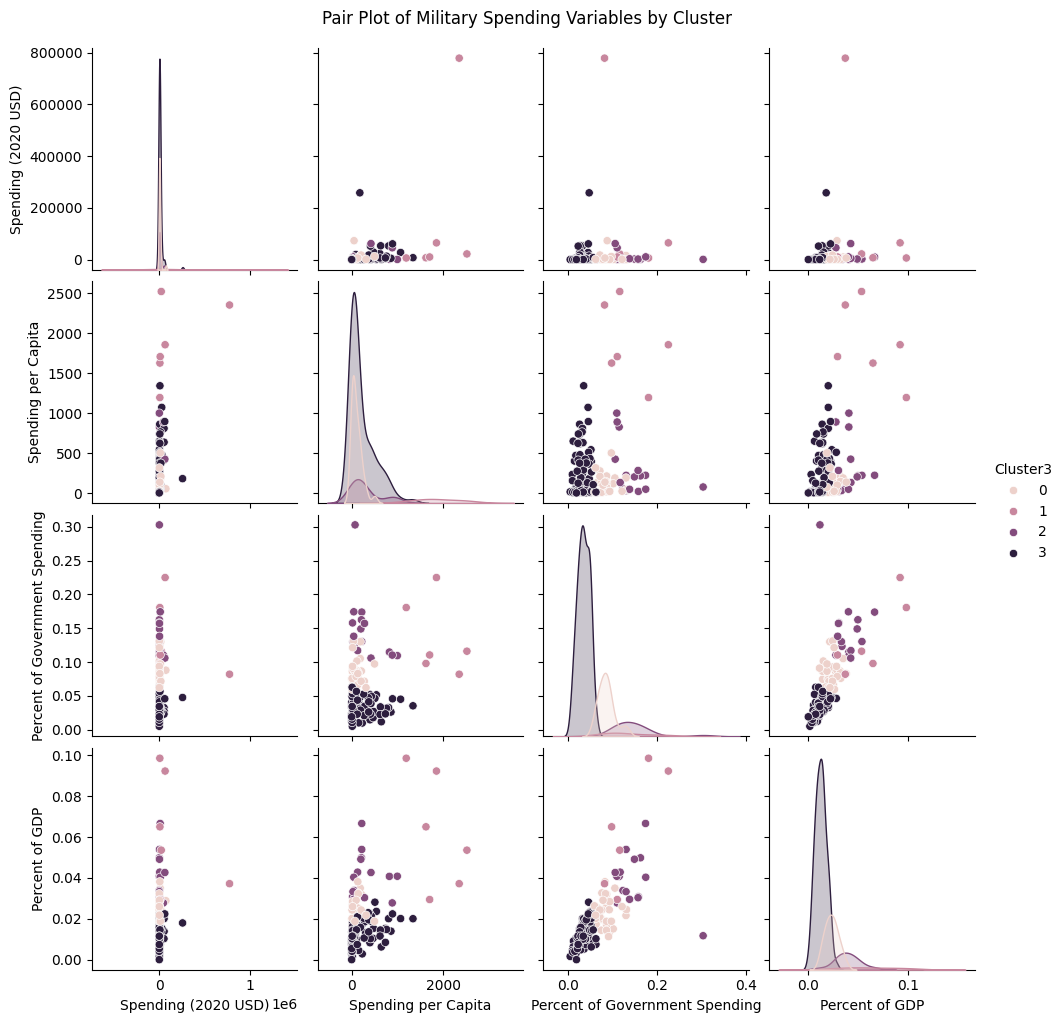

In [10]:
# Create pair plot for all four variables
plt.figure(figsize=(12, 12))
sns.pairplot(data=df_2020, 
             vars=['Spending (2020 USD)', 'Spending per Capita', 
                   'Percent of Government Spending', 'Percent of GDP'],
             hue='Cluster3',
             diag_kind='kde')
plt.suptitle('Pair Plot of Military Spending Variables by Cluster', y=1.02)
plt.show()

In [ ]:
# The k-means clustering algorithm identified patterns in the military expenditure data, revealing spending patterns across different countries. This analysis helps understand how countries prioritize military spending in different ways, whether measured by absolute amounts or relative to their economic size and government budgets. The clustering reveals that military spending patterns are complex and cannot be fully understood by looking at any single metric in isolation.